In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
advertise=pd.read_csv("advertising.csv")

In [73]:
advertise.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [74]:
advertise.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [75]:
advertise.set_index('Unnamed: 0',inplace=True)

In [76]:
advertise.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In Tv column large difference between 75% and max, which shows there are outliers

In [77]:
advertise.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [78]:
advertise.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


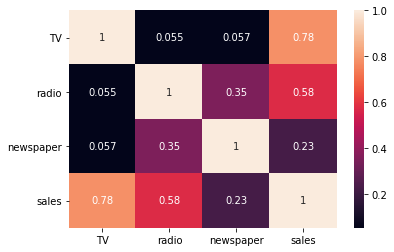

In [79]:
sns.heatmap(advertise.corr(),annot=True)

TV and Radio have highly positive correlated with sales

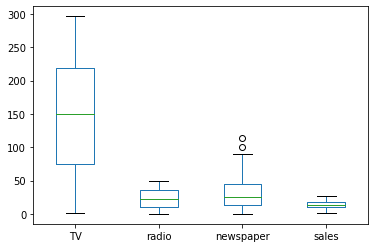

In [80]:
advertise.plot(kind='box')

In [81]:
advertise.head()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [82]:
from scipy.stats import zscore
z=np.abs(zscore(advertise))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [83]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


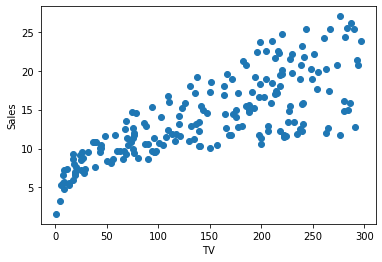

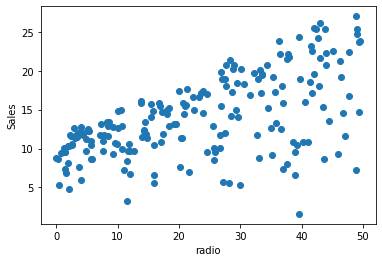

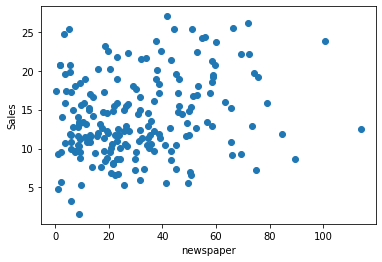

In [84]:
columns=['TV', 'radio', 'newspaper']
for i in columns:
    x=advertise[i]
    y=advertise['sales']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.show()

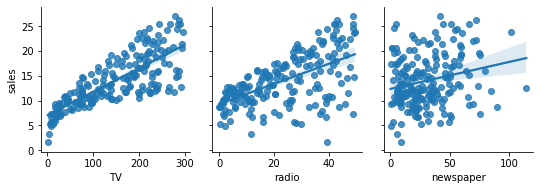

In [85]:
sns.pairplot(advertise,x_vars=['TV','radio','newspaper'],y_vars='sales',aspect=1, kind='reg')


In [86]:
ad_new=advertise[(z<3).all(axis=1)]

TV              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
radio        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
newspaper    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sales        AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

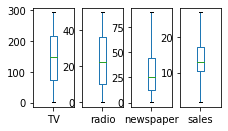

In [87]:
ad_new.plot(kind='box',subplots=True,layout=(2,7))

Outliers removed

In [96]:
ad_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

All the values of skewness are in range of -0.5 to +0.5 except of the Newspaper column so its needed to correct them

In [97]:
y=ad_new['sales']
x=ad_new.drop(['sales'],axis=1)

In [98]:
x.shape

(198, 3)

In [99]:
y.shape

(198,)

In [100]:
x['newspaper']=np.cbrt(x['newspaper'])   
x.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.341008
dtype: float64

In [104]:
from sklearn.preprocessing import StandardScaler
collist=['TV', 'radio', 'newspaper']
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=collist)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.513124
1,-1.199012,1.090705,0.826663
2,-1.519332,1.535913,1.515609
3,0.056456,1.225616,1.232055
4,0.400243,-0.831784,1.229273
...,...,...,...
193,-1.272932,-1.310720,-0.632908
194,-0.615864,-1.229773,-1.123630
195,0.355657,-0.932968,-1.314309
196,1.606431,1.272836,1.437428


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge

In [106]:
lr=LinearRegression()

In [109]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    rscore=r2_score(y_test,predlr)
    if rscore>maxr2:
        maxr2=rscore
        maxRS=i
print("Best r score is ",maxr2," on Random_state ",maxRS)

Best r score is  0.9357326865451275  on Random_state  90


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=90)

In [111]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
rscore=r2_score(y_test,predlr)
print(rscore)

0.9357326865451275


In [114]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(cv_mean)
    

0.8897903164535107
0.8889605146727085
0.8885900019980308
0.8859558032422779
0.8869520831099137
0.8841453973478445
0.8884135337736271
0.8813594246427138


here we pick cv=2 which has slightest best score

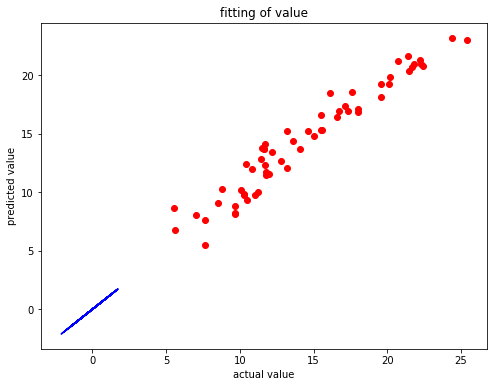

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(x_test,x_test,color='b')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('fitting of value')
plt.show()

Regularization

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [124]:
parameters={'alpha':[0.0001,0.001,0.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [126]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9356452233294784

In [129]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.8900044267010467

Ensemble Technique

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_params_)


0.9672676566027327
{'criterion': 'mse', 'max_features': 'auto'}


In [133]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec=rf.predict(x_test)
rfs=r2_score(y_test,pred_dec)
print('rfs score:', rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfscore=rfscore.mean()
print('cross val:',rfscore*100)

rfs score: 97.1335843829591
cross val: 97.53798448248878


we are getting both r2 score and cross val score around 97%.

In [134]:
import joblib

In [135]:
joblib.dump(rf,'advertise.obj') #dumping the value

['advertise.obj']